<a href="https://colab.research.google.com/github/smartaces/OpenAI_Swarms_Airline_Support_API_Calls_Personal_Shopper_Colab_Notebook/blob/main/Shared_OpenAI_Agent_Swarms_Airline_Support_and_Personal_Shopper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OpenAI Swarms API Calling Agents, Airline Support, Personal Shoppers and More**

*   This is a follow up to my OpenAI agentic swarms basic demos notebook available here: https://github.com/smartaces/openai_agentic_swarms_live_webapi_chat_assistant

*   It includes everything you need to run some of the more expanded OpenAI swarm agent examples from their Github repo which you can find here: https://github.com/openai/swarm

*   I have made some amendments to the original code so it is better supported by Colab.

*   I have also added in a couple of original demos not included in the OpenAI repo.



# **Connect with Me**

*   If you like this notebook or in any way found it helpful, feel free to connect with me on LinkedIn here: https://www.linkedin.com/in/james-bentley-1b329214/

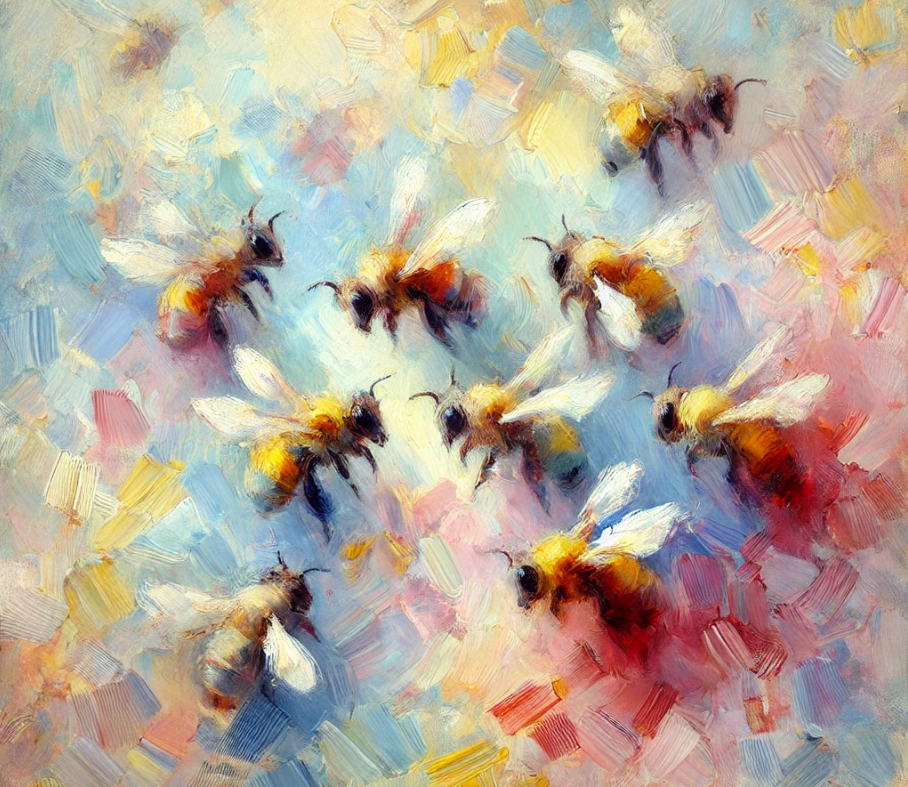

# **The Demos Include:**

1. Broken down car salesman agent, single agent no triage, (*original by me*).

2. Web API retrieval agent, single agent calling from web APIs, (*original by me*).

3. Airline Support Agent, multiple triage agents, (by OpenAI - *modified for Colab*).

4. Personal Shopper Agent, calls info from an SQL Lite Database, (by OpenAI - *modified for Colab*).

5. Beekeeping Sales Agent, multiple triage agents, (by OpenAI - *modified for Colab*).

# **Essential Step: Installs OpenAI python library**

First we need to install the OpenAI python Library

In [ ]:
#installs
!pip install numpy openai>=1.33.0 pytest requests tqdm pre-commit instructor --quiet

In [ ]:
!pip install git+https://github.com/openai/swarm.git

  Cloning https://github.com/openai/swarm.git to /tmp/pip-req-build-j648sxyk
  Running command git clone --filter=blob:none --quiet https://github.com/openai/swarm.git /tmp/pip-req-build-j648sxyk
  Resolved https://github.com/openai/swarm.git to commit 9db581cecaacea0d46a933d6453c312b034dbf47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for swarm: filename=swarm-0.1.0-py3-none-any.whl size=26001 sha256=3be432e35bc5a3fc2e7613b4429e9b89dcbe3e99502d2dc431b938207446cb1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_sa7p_3n/wheels/46/9a/f7/7b8bbb674ae80ef0f62a632706c2c4cdfcf708e4da32e4e256
Successfully built swarm


# **Essential Step: Set Your OpenAI Key**

To use this notebook and build your solution you will need...


*   An OpenAI user account and API Key (with billing set up)
*   As pictured below add this to your Google Secrets (see the key icon on the left panel) inserting your key in the 'value' field and assigning the following name
*   Key name: openai_key
*   Once that is done, run the below cell[link text](https://), granting key access to the notebook access if prompted




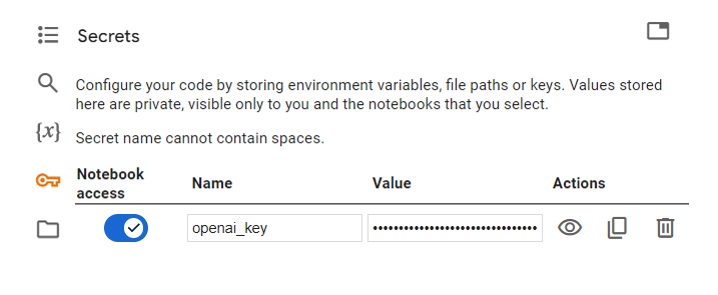


In [ ]:
import os
from openai import OpenAI
from google.colab import userdata
from swarm import Swarm, Agent

# Retrieve your OpenAI API key from Google Colab Secrets
openai_key = userdata.get('openai_key')

# Set the OpenAI API key as an environment variable
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the Swarm client
client = Swarm()

# **Essential Step: Clone The Swarm Github**

This grabs all the files you need and adds it to the folders section in the left of this menu in a folder called swarm



In [ ]:
! git clone https://github.com/openai/swarm.git

Cloning into 'swarm'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 336 (delta 69), reused 138 (delta 47), pack-reused 118 (from 1)
Receiving objects: 100% (336/336), 547.47 KiB | 4.64 MiB/s, done.
Resolving deltas: 100% (74/74), done.


# **Essential Step: Interrupt Execution After Agent Conversations**

In all of the below examples where you end up speaking to an agent, once you are done with the demo make sure you click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running.

You need to do this to test other demos in the workbook.

For example if you have tested the broken down car salesman agent, and want to test the airline agent, make sure you navigate to the Runtime menu as pictured below and interrupt the execution.

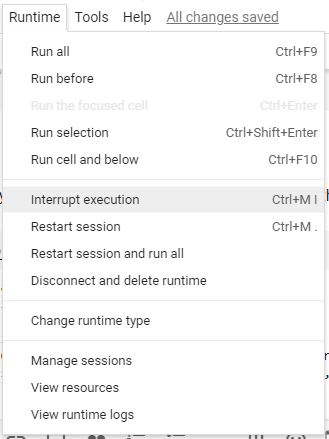



#**More Developed Agent Interaction Demos**

Ok so from here down the OpenAI agent swarm demos get more interesting. The first example below is one which I set up to act as a broken car salesman... it gives an idea of how agents can be defined with personalities and simple motivations in the instructions you write for them.  

-------

#**Broken Car Salesman Agent Chat Loop (With No Triage To Helper Agents)**

In this example the Agent is on a mission to sell you a broken down car. This is just a looping conversation with a single agent and doesn't involve any triage to other helpers.

**Important**

*Once you are done with speaking to the agent make sure you click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.*

In [ ]:
# a bit of styling for the conversation
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
#the agent code
from swarm import Swarm, Agent

client = Swarm()

my_agent = Agent(
    name="Agent",
    instructions="""You are a helpful agent that at every opportunity seeks to sell the user a broken down car.
                  You know the car is broken down, but find ingenious ways to frame the benefits of a broken down car""",
)


# Emoji and role mappings
EMOJI_MAP = {
    "user": "😊 ",
    "assistant": "🤖 "
}

ROLE_TO_SENDER = {
    "user": "User",
    "agent": "Agent"
}

def pretty_print_messages(messages):
    for message in messages:
        if message["content"] is None:
            continue
        role = message["role"]
        emoji = EMOJI_MAP.get(role, "")
        sender = ROLE_TO_SENDER.get(role, role.capitalize())
        print(f"{emoji} {sender}: {message['content']}\n")

messages = []
agent = my_agent
while True:
    user_input = input(f"{EMOJI_MAP['user']} User > ")
    messages.append({"role": "user", "content": user_input})
    print("")  # Line break after user input

    response = client.run(agent=agent, messages=messages)
    messages = response.messages
    agent = response.agent
    pretty_print_messages(messages[-1:])  # Only print the last message (agent's response)

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

-------

# **Single Assistant With Multi Functionality and Web Information Retrieval from APIs**

This agent can do a bunch of things, ask it to find out. It calls information from live web apis, like cat pictures.

**Important**

*Once you are done with speaking to the agent make sure you click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.*

In [ ]:
import requests
import random
from swarm import Swarm, Agent
from IPython.display import display, HTML

client = Swarm()

# Hardcoded list of quotes
QUOTES = [
    {"quote": "Be the change you wish to see in the world.", "author": "Mahatma Gandhi"},
    {"quote": "Stay hungry, stay foolish.", "author": "Steve Jobs"},
    {"quote": "The only way to do great work is to love what you do.", "author": "Steve Jobs"},
    {"quote": "In the middle of difficulty lies opportunity.", "author": "Albert Einstein"},
    {"quote": "Imagination is more important than knowledge.", "author": "Albert Einstein"},
    {"quote": "The greatest glory in living lies not in never falling, but in rising every time we fall.", "author": "Nelson Mandela"},
    {"quote": "The future belongs to those who believe in the beauty of their dreams.", "author": "Eleanor Roosevelt"},
    {"quote": "Success is not final, failure is not fatal: it is the courage to continue that counts.", "author": "Winston Churchill"},
    {"quote": "The only limit to our realization of tomorrow will be our doubts of today.", "author": "Franklin D. Roosevelt"},
    {"quote": "Life is what happens to you while you're busy making other plans.", "author": "John Lennon"}
]

# Hardcoded list of movies
MOVIES = [
    {"title": "The Shawshank Redemption", "year": 1994, "genre": "Drama"},
    {"title": "The Godfather", "year": 1972, "genre": "Crime"},
    {"title": "The Dark Knight", "year": 2008, "genre": "Action"},
    {"title": "12 Angry Men", "year": 1957, "genre": "Drama"},
    {"title": "Schindler's List", "year": 1993, "genre": "Biography"},
    {"title": "The Lord of the Rings: The Return of the King", "year": 2003, "genre": "Adventure"},
    {"title": "Pulp Fiction", "year": 1994, "genre": "Crime"},
    {"title": "The Good, the Bad and the Ugly", "year": 1966, "genre": "Western"},
    {"title": "Forrest Gump", "year": 1994, "genre": "Drama"},
    {"title": "Inception", "year": 2010, "genre": "Sci-Fi"}
]

def get_weather(location) -> str:
    weathers = ["sunny", "cloudy", "rainy", "snowy"]
    temp = random.randint(0, 30)
    weather = random.choice(weathers)
    return f"Temperature in {location}: {temp}°C, {weather}"

def print_account_details(context_variables: dict):
    user_id = context_variables.get("user_id", None)
    name = context_variables.get("name", None)
    print(f"Account Details: {name} {user_id}")
    return "Success"

def get_random_movie() -> dict:
    return random.choice(MOVIES)

def get_movie_clue(movie_title: str) -> str:
    movie = next((m for m in MOVIES if m['title'].lower() == movie_title.lower()), None)
    if movie:
        return f"This movie was released in {movie['year']}. It's a {movie['genre']} film."
    return "Movie not found in the list."

def get_random_quote() -> str:
    quote = random.choice(QUOTES)
    return f'"{quote["quote"]}" - {quote["author"]}'

def get_cat_image() -> str:
    response = requests.get('https://api.thecatapi.com/v1/images/search')
    if response.status_code == 200:
        cat_url = response.json()[0]['url']
        display(HTML(f'<img src="{cat_url}" style="max-height: 400px; width: auto;">'))
        return "Cat image displayed successfully!"
    return "Failed to fetch cat image."

def get_random_joke() -> str:
    response = requests.get('https://official-joke-api.appspot.com/random_joke')
    if response.status_code == 200:
        joke = response.json()
        return f"{joke['setup']} ... {joke['punchline']}"
    return "Failed to fetch a joke."

def get_random_fact() -> str:
    response = requests.get('https://uselessfacts.jsph.pl/random.json?language=en')
    if response.status_code == 200:
        return response.json()['text']
    return "Failed to fetch a random fact."

def instructions(context_variables):
    name = context_variables.get("name", "User")
    movie_title = context_variables.get("movie_title", "Unknown Movie")
    return f"""You are a helpful agent.
    If the user asks for the weather, ask them for their location and use the get_weather function.
    If the user asks for account details, use the print_account_details function.
    If the user asks to play a movie guessing game, use get_random_movie to select a movie, then use get_movie_clue to provide a clue about "{movie_title}".
    Do not reveal the actual movie title unless the user guesses correctly.
    If the user asks for a quote, use the get_random_quote function to provide a random quote.
    If the user asks for a cat image, use the get_cat_image function to display a random cat image.
    If the user asks for a joke, use the get_random_joke function.
    If the user asks for a random fact, use the get_random_fact function."""

agent = Agent(
    name="Agent",
    instructions=instructions,
    functions=[get_weather, print_account_details, get_random_movie, get_movie_clue, get_random_quote, get_cat_image, get_random_joke, get_random_fact],
)

def pretty_print_messages(messages):
    role_mapping = {
        "user": "😊 User",
        "assistant": "🤖 Assistant"
    }
    for message in messages:
        if message.get("content") is None:
            continue
        role = message.get("role", "unknown")
        content = message.get("content", "")
        role_prefix = role_mapping.get(role, role.capitalize())
        print(f"{role_prefix} > {content}\n")

messages = []
context_variables = {
    "name": "James",
    "user_id": 123,
    "movie_title": get_random_movie()['title']
}

print("Welcome! You can start interacting with the agent. Try asking about the weather, your account details, playing a movie guessing game, getting a quote, seeing a cat image, hearing a joke, or learning a random fact.")
while True:
    user_input = input("😊 User > ")
    messages.append({"role": "user", "content": user_input})
    print("")  # Line break after user input

    response = client.run(agent=agent, messages=messages, context_variables=context_variables)
    messages = response.messages
    agent = response.agent
    pretty_print_messages(messages[-1:])  # Only print the last message (agent's response)

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

------


# **Airline Service Agents Triage and Function Calling Examples**

Airline customer service
This example demonstrates a multi-agent setup for handling different customer service requests in an airline context using the Swarm framework. The agents can triage requests, handle flight modifications, cancellations, and lost baggage cases. This example uses the helper function run_demo_loop, which allows us to create an interactive Swarm session.

Agents
*   Triage Agent: Determines the type of request and transfers to the appropriate agent.

*   Flight Modification Agent: Handles requests related to flight modifications, further triaging them into:

*   Flight Cancel Agent: Manages flight cancellation requests.

*   Flight Change Agent: Manages flight change requests.

*   Lost Baggage Agent: Handles lost baggage inquiries.

How the agent handles your questions will depend on the inputs you provide... here are the details they have on file for you for this hypothetical scenario

1. CUSTOMER_ID: customer_12345
2. NAME: John Doe
3. PHONE_NUMBER: (123) 456-7890
4. EMAIL: johndoe@example.com
5. STATUS: Premium
6. ACCOUNT_STATUS: Active
7. BALANCE: $0.00
8. LOCATION: 1234 Main St, San Francisco, CA 94123, USA
""",
    "flight_context": """The customer has an upcoming flight from LGA (Laguardia) in NYC to LAX in Los Angeles.
The flight # is 1919. The flight departure date is 3pm ET, 5/21/2024."""

If you want to see the respective rules governing how the agents will respond to your requests for flight cancellations, changes and lost baggage, navigate the swarms folder to your left...

* Baggage policy instructions for agent: /content/swarm/examples/airline/data/routines/baggage/policies.py

* Flight modification policy instructions for agent: /content/swarm/examples/airline/data/routines/flight_modification/policies.py

In [ ]:
#apply some styling to the airline chat

#some styling
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### **Launch The Airline Agent**

To run this agent, all you need to do is hit the below cell, and it will load the file to launch the agents.

This agent demo is more sophisticated than the ones above, with multiple different code scripts used to route and govern agentic actions.

In [ ]:
%run /content/swarm/examples/airline/main.py

Starting Swarm CLI 🐝
User: hello
[2024-10-23 20:09:18] Getting chat completion for...: [{'role': 'system', 'content': "You are to triage a users request, and call a tool to transfer to the right intent.\n    Once you are ready to transfer to the right intent, call the tool to transfer to the right intent.\n    You dont need to know specifics, just the topic of the request.\n    When you need more information to triage the request to an agent, ask a direct question without explaining why you're asking it.\n    Do not share your thought process with the user! Do not make unreasonable assumptions on behalf of user.\n    The customer context is here: Here is what you know about the customer's details:\n1. CUSTOMER_ID: customer_12345\n2. NAME: John Doe\n3. PHONE_NUMBER: (123) 456-7890\n4. EMAIL: johndoe@example.com\n5. STATUS: Premium\n6. ACCOUNT_STATUS: Active\n7. BALANCE: $0.00\n8. LOCATION: 1234 Main St, San Francisco, CA 94123, USA\n, and flight context is here: The customer has an upco

KeyboardInterrupt: Interrupted by user

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

### **Airline Agent Evaluations**

So the airline agent also includes toy evaluations, that provide insights on the agents behaviour, activities and performance. However the out of the box scipt from OpenAI doesn't work in Colab, so it needs a minor amendment.

Run the below cell and in automatically modifies the necessary part, and then run the cell below to launch a dummy evaluation.


In [ ]:
%%writefile /content/swarm/examples/airline/evals/function_evals.py

import json
import os
import sys

# Adding the necessary paths to sys.path
sys.path.append("/content/swarm")
sys.path.append("/content/swarm/examples/airline")

# Import the module after appending the correct paths
from evals.eval_utils import run_function_evals
from configs.agents import triage_agent, flight_modification

# Absolute paths to the JSON files and evaluation results
triage_test_cases = "/content/swarm/examples/airline/evals/eval_cases/triage_cases.json"
flight_modification_cases = "/content/swarm/examples/airline/evals/eval_cases/flight_modification_cases.json"
eval_results_dir = "/content/swarm/examples/airline/evals/eval_results"
triage_eval_path = f"{eval_results_dir}/triage_evals.json"
flight_modification_eval_path = f"{eval_results_dir}/flight_modification_evals.json"

n = 5

if __name__ == "__main__":
    # Check current working directory for debugging
    print("Current working directory:", os.getcwd())

    # Run triage_agent evals
    with open(triage_test_cases, "r") as file:
        triage_test_cases = json.load(file)

    run_function_evals(
        triage_agent,
        triage_test_cases,
        n,
        eval_path=triage_eval_path,
    )

    # Run flight modification evals
    with open(flight_modification_cases, "r") as file:
        flight_modification_cases = json.load(file)

    run_function_evals(
        flight_modification,
        flight_modification_cases,
        n,
        eval_path=flight_modification_eval_path,
    )

Overwriting /content/swarm/examples/airline/evals/function_evals.py


*   Now you can run the evaluations script...



In [ ]:
#run the example evals

%run /content/swarm/examples/airline/evals/function_evals.py

Current working directory: /content
----------------------------------------------------------------------------------------------------
Conversation: [{'role': 'user', 'content': 'My bag was not delivered!'}]

Iteration: 1/5
Expected function:  transfer_to_lost_baggage, Got: transfer_to_lost_baggage

Iteration: 2/5
Expected function:  transfer_to_lost_baggage, Got: transfer_to_lost_baggage

Iteration: 3/5
Expected function:  transfer_to_lost_baggage, Got: transfer_to_lost_baggage

Iteration: 4/5
Expected function:  transfer_to_lost_baggage, Got: transfer_to_lost_baggage

Iteration: 5/5
Expected function:  transfer_to_lost_baggage, Got: transfer_to_lost_baggage

Correct functions for this case: 5 out of 5
Accuracy for this case: 100.00%
----------------------------------------------------------------------------------------------------
Conversation: [{'role': 'user', 'content': 'I had some turbulence on my flight'}]

Iteration: 1/5
Expected function:  None, Got: None
Message: What spec

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

-----------------

# **Personal Shopper**

This is quite a contained agent triage example which also includes agents making reference to a (very small) demo dataset of products in a database.

*   To make the original OpenAI swarms code work in Colab, we need to make a couple of updates to the scripts.

*   And then we are good to load up the agent!

***Personal Shopper Script Update 1...***

In [ ]:
%%writefile /content/swarm/examples/personal_shopper/database.py
import sqlite3
import datetime

# global connection
conn = None

def get_connection():
    global conn
    if conn is None:
        conn = sqlite3.connect("application.db")
    return conn

def create_database():
    conn = get_connection()
    cursor = conn.cursor()

    # Create Users table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Users (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER UNIQUE,
            first_name TEXT,
            last_name TEXT,
            email TEXT UNIQUE,
            phone TEXT
        )
    """)

    # Create PurchaseHistory table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS PurchaseHistory (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER,
            date_of_purchase TEXT,
            item_id INTEGER,
            amount REAL,
            FOREIGN KEY (user_id) REFERENCES Users(user_id)
        )
    """)

    # Create Products table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Products (
            product_id INTEGER PRIMARY KEY,
            product_name TEXT NOT NULL,
            price REAL NOT NULL
        )
    """)

    conn.commit()

def add_user(user_id, first_name, last_name, email, phone):
    conn = get_connection()
    cursor = conn.cursor()

    try:
        cursor.execute("""
            INSERT OR REPLACE INTO Users (user_id, first_name, last_name, email, phone)
            VALUES (?, ?, ?, ?, ?)
        """, (user_id, first_name, last_name, email, phone))
        conn.commit()
    except sqlite3.Error as e:
        print(f"Database Error: {e}")

def add_purchase(user_id, date_of_purchase, item_id, amount):
    conn = get_connection()
    cursor = conn.cursor()

    try:
        cursor.execute("""
            INSERT INTO PurchaseHistory (user_id, date_of_purchase, item_id, amount)
            VALUES (?, ?, ?, ?)
        """, (user_id, date_of_purchase, item_id, amount))
        conn.commit()
    except sqlite3.Error as e:
        print(f"Database Error: {e}")

def add_product(product_id, product_name, price):
    conn = get_connection()
    cursor = conn.cursor()

    try:
        cursor.execute("""
            INSERT OR REPLACE INTO Products (product_id, product_name, price)
            VALUES (?, ?, ?)
        """, (product_id, product_name, price))
        conn.commit()
    except sqlite3.Error as e:
        print(f"Database Error: {e}")

def close_connection():
    global conn
    if conn:
        conn.close()
        conn = None

def preview_table(table_name):
    conn = get_connection()
    cursor = conn.cursor()

    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5")
    rows = cursor.fetchall()

    for row in rows:
        print(row)

def initialize_database():
    create_database()

    # Add some initial users
    initial_users = [
        (1, "Alice", "Smith", "alice@test.com", "123-456-7890"),
        (2, "Bob", "Johnson", "bob@test.com", "234-567-8901"),
        (3, "Sarah", "Brown", "sarah@test.com", "555-567-8901"),
    ]

    for user in initial_users:
        add_user(*user)

    # Add some initial purchases
    initial_purchases = [
        (1, "2024-01-01", 101, 99.99),
        (2, "2023-12-25", 100, 39.99),
        (3, "2023-11-14", 307, 49.99),
    ]

    for purchase in initial_purchases:
        add_purchase(*purchase)

    # Add some initial products
    initial_products = [
        (7, "Hat", 19.99),
        (8, "Wool socks", 29.99),
        (9, "Shoes", 39.99),
    ]

    for product in initial_products:
        add_product(*product)

Overwriting /content/swarm/examples/personal_shopper/database.py


***Personal Shopper Script Update 2...***

In [ ]:
%%writefile /content/swarm/examples/personal_shopper/main.py
import sys
sys.path.append('/content/swarm/examples/personal_shopper')
import swarm
import datetime
import random

import database
from swarm import Agent
from swarm import Swarm, Agent
from swarm.repl import run_demo_loop

def refund_item(user_id, item_id):
    """Initiate a refund based on the user ID and item ID.
    Takes as input arguments in the format '{"user_id":"1","item_id":"3"}'
    """
    conn = database.get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        SELECT amount FROM PurchaseHistory
        WHERE user_id = ? AND item_id = ?
    """, (user_id, item_id))
    result = cursor.fetchone()
    if result:
        amount = result[0]
        print(f"Refunding ${amount} to user ID {user_id} for item ID {item_id}.")
    else:
        print(f"No purchase found for user ID {user_id} and item ID {item_id}.")
    print("Refund initiated")

def notify_customer(user_id, method):
    """Notify a customer by their preferred method of either phone or email.
    Takes as input arguments in the format '{"user_id":"1","method":"email"}'"""
    conn = database.get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        SELECT email, phone FROM Users
        WHERE user_id = ?
    """, (user_id,))
    user = cursor.fetchone()
    if user:
        email, phone = user
        if method == "email" and email:
            print(f"Emailed customer {email} a notification.")
        elif method == "phone" and phone:
            print(f"Texted customer {phone} a notification.")
        else:
            print(f"No {method} contact available for user ID {user_id}.")
    else:
        print(f"User ID {user_id} not found.")

def order_item(user_id, product_id):
    """Place an order for a product based on the user ID and product ID.
    Takes as input arguments in the format '{"user_id":"1","product_id":"2"}'"""
    date_of_purchase = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    item_id = random.randint(1, 300)

    conn = database.get_connection()
    cursor = conn.cursor()
    cursor.execute("""
        SELECT product_id, product_name, price FROM Products
        WHERE product_id = ?
    """, (product_id,))
    result = cursor.fetchone()
    if result:
        product_id, product_name, price = result
        print(f"Ordering product {product_name} for user ID {user_id}. The price is ${price}.")
        database.add_purchase(user_id, date_of_purchase, item_id, price)
    else:
        print(f"Product {product_id} not found.")

# Initialize the database
database.initialize_database()

# Preview tables
database.preview_table("Users")
database.preview_table("PurchaseHistory")
database.preview_table("Products")

# Define the agents
refunds_agent = Agent(
    name="Refunds Agent",
    description="""You are a refund agent that handles all actions related to refunds after a return has been processed.
    You must ask for both the user ID and item ID to initiate a refund. Ask for both user_id and item_id in one message.
    If the user asks you to notify them, you must ask them what their preferred method of notification is. For notifications, you must
    ask them for user_id and method in one message.""",
    functions=[refund_item, notify_customer],
)

sales_agent = Agent(
    name="Sales Agent",
    description="""You are a sales agent that handles all actions related to placing an order to purchase an item.
    Regardless of what the user wants to purchase, must ask for BOTH the user ID and product ID to place an order.
    An order cannot be placed without these two pieces of information. Ask for both user_id and product_id in one message.
    If the user asks you to notify them, you must ask them what their preferred method is. For notifications, you must
    ask them for user_id and method in one message.""",
    functions=[order_item, notify_customer],
)

def create_triage_agent(name, instructions, agents, add_backlinks=True):
    def create_transfer_function(agent_name):
        def transfer_to_agent():
            return next(agent for agent in agents if agent.name == agent_name)
        transfer_to_agent.__name__ = f"transfer_to_{agent_name.lower().replace(' ', '_')}"
        return transfer_to_agent

    triage_functions = [create_transfer_function(agent.name) for agent in agents]

    return Agent(
        name=name,
        description=instructions,
        functions=triage_functions
    )

triage_agent = create_triage_agent(
    name="Triage Agent",
    instructions="""You are to triage a users request, and call a tool to transfer to the right intent.
    Once you are ready to transfer to the right intent, call the tool to transfer to the right intent.
    You dont need to know specifics, just the topic of the request.
    If the user request is about making an order or purchasing an item, transfer to the Sales Agent.
    If the user request is about getting a refund on an item or returning a product, transfer to the Refunds Agent.
    When you need more information to triage the request to an agent, ask a direct question without explaining why you're asking it.
    Do not share your thought process with the user! Do not make unreasonable assumptions on behalf of user.""",
    agents=[sales_agent, refunds_agent],
    add_backlinks=True,
)

for f in triage_agent.functions:
    print(f.__name__)

if __name__ == "__main__":
    # Run the demo loop
    run_demo_loop(triage_agent, debug=False)

Overwriting /content/swarm/examples/personal_shopper/main.py


***Load Up The Personal Shopper Agent***

This example is quite contained, but it gives an idea of how agents can be used to lookup against a traditional SQL Lite database.

The demo enables the routing of a customer (you) to either a sales agent or refund agent.

***Sales Agent***

To buy a product from the sales agent you will need to provide the AI assistant your user ID, and a product ID when prompted.

You will know that this example is successful when it returns the correct product price for the ID you submit, and the correct user email address when you request an email reciept for your purchase.

These are the respective details you can refer to when testing these agents...


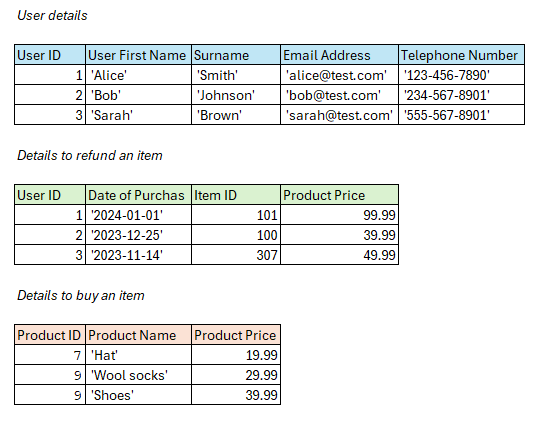

In [ ]:
!python /content/swarm/examples/personal_shopper/main.py

(1, 1, 'Alice', 'Smith', 'alice@test.com', '123-456-7890')
(2, 2, 'Bob', 'Johnson', 'bob@test.com', '234-567-8901')
(3, 3, 'Sarah', 'Brown', 'sarah@test.com', '555-567-8901')
(1, 1, '2024-01-01', 101, 99.99)
(2, 2, '2023-12-25', 100, 39.99)
(3, 3, '2023-11-14', 307, 49.99)
(7, 'Hat', 19.99)
(8, 'Wool socks', 29.99)
(9, 'Shoes', 39.99)
transfer_to_sales_agent
transfer_to_refunds_agent
Starting Swarm CLI 🐝
User: hello
Triage Agent: Hello! How can I assist you today?
User: id' like a refund
Triage Agent: transfer_to_refunds_agent()
Refunds Agent: I can help with processing a refund. Could you please provide your user ID and the item ID for which you would like a refund?
User: my user id is 2 and my item id is 101
No purchase found for user ID 2 and item ID 101.
Refund initiated
Refunds Agent: refund_item("user_id"= "2", "item_id"= "101")
Refunds Agent: The refund for item ID 101 has been initiated for you. Is there anything else you would like help with?
User: what happens next
Refunds Ag

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

--------

# **Beekeeping Sales Agent - Triage to Refund or Discount**

This is a basic agent allows you to ask for a refund on some bees, or obtain a discount if you say the item is too expensive.


In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!python /content/swarm/examples/triage_agent/run.py

Starting Swarm CLI 🐝
User: hello
Triage Agent: Hello! How can I assist you today?
User: i would like to buy something
Triage Agent: transfer_to_sales()
Sales Agent: I'd be delighted to assist you! Are you ready to explore the world of bees? They're absolutely buzzing with potential! Whether you're interested in honey production, pollination services, or simply want to support the environment, bees are the perfect choice. Let me know what you're looking for, and I'll give you all the sweet details! 🐝🍯
User: i'd like to buy a bee keepers suit
Sales Agent: transfer_back_to_triage()
Triage Agent: Great choice! Let me connect you to our sales agent who can help you with purchasing a beekeeper's suit. Please hold on a moment.
transfer_to_sales()
Sales Agent: Our exquisitely designed beekeeper suits offer unparalleled protection while ensuring maximum comfort. Made from top-quality materials that are both durable and breathable, these suits ensure you stay safe from bee stings as you work har

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.